In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
! pip install matplotlib
! pip install pandas
! pip install numpy 

In [ ]:
telecom_cust = pd.read_csv('Telco-Customer-Churn.csv') 

In [ ]:
telecom_cust.columns = telecom_cust.columns.str.replace(';', '')
telecom_cust.replace(';','', regex=True, inplace=True) 

In [ ]:
df2 = telecom_cust.iloc[:,1:] 

In [ ]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)


In [ ]:
df_dummies = pd.get_dummies(df2)
df_dummies.head() 

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,...,TotalCharges_973.35,TotalCharges_973.45,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_979.5,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_980.35,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_993.15,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Data Exploration

Text(0.5, 1.0, 'Gender Distribution')

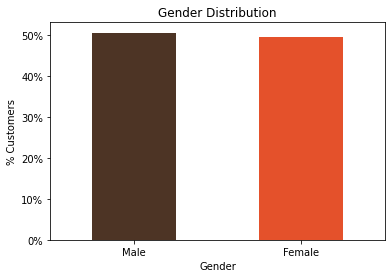

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution') 

In [ ]:
totals = [] 

In [ ]:
for i in ax.patches:
  totals.append(i.get_width()) 
# set individual bar labels using above list 
total = sum(totals) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
# We will use the data frame where we had created dummy variables 
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn']) 
# Scaling all the variables to a range of 0 to 1 
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features 
# Create Train & Test Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 
# Running logistic regression model 
model = LogisticRegression()
result = model.fit(X_train, y_train) 
prediction_test = model.predict(X_test) 

Model Accuracy: 80.45 %
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


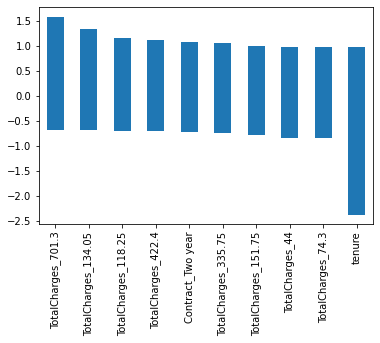

In [ ]:
model_accuracy = metrics.accuracy_score(y_test, prediction_test)
model_accuracy = np.round(model_accuracy*100,decimals=2)
print("Model Accuracy: " + str(model_accuracy) + " %") 
# To get the weights of all the variables 
weights = pd.Series(model.coef_[0], index=X.columns.values)
print  (weights.sort_values(ascending  = False)[:10].plot(kind='bar')) 
print(weights.sort_values(ascending   = False)[-10:].plot(kind='bar')) 

Model Accuracy: 74.95 %


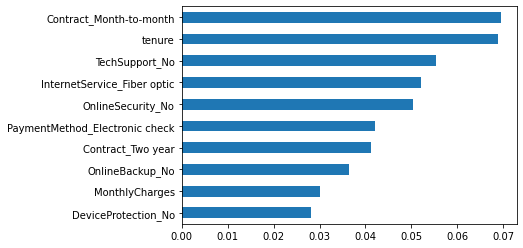

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1, 
random_state =50, max_features = "auto",
max_leaf_nodes = 30) 
model_rf.fit(X_train, y_train) 
# Make predictions 
prediction_test = model_rf.predict(X_test) 
# print (metrics.accuracy_score(y_test, prediction_test)) 
model_accuracy = metrics.accuracy_score(y_test, prediction_test)
model_accuracy = np.round(model_accuracy*100,decimals=2)
print("Model Accuracy: " + str(model_accuracy) + " %")
importances = model_rf.feature_importances_
weights = pd.Series(importances, 
index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh') 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) 
from sklearn.svm import SVC
model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
prediction_test = model.svm.predict(X_test) 
# metrics.accuracy_score(y_test, preds) 
model_accuracy = metrics.accuracy_score(y_test, prediction_test)
model_accuracy = np.round(model_accuracy*100,decimals=2)
print("Model Accuracy: " + str(model_accuracy) + " %") 

Model Accuracy: 79.84 %


In [ ]:
# AdaBoost Algorithm 
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier() 
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value) 
model.fit(X_train,y_train)
prediction_test = model.predict(X_test) 
# metrics.accuracy_score(y_test, preds)
model_accuracy = metrics.accuracy_score(y_test, prediction_test)
model_accuracy = np.round(model_accuracy*100,decimals=2)
print("Model Accuracy: " + str(model_accuracy) + " %")  

Model Accuracy: 80.13 %


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
prediction_test = model.predict(X_test) 
# metrics.accuracy_score(y_test, preds) 
model_accuracy = metrics.accuracy_score(y_test, prediction_test)
model_accuracy = np.round(model_accuracy*100,decimals=2)
print("Model Accuracy: " + str(model_accuracy) + " %") 

Model Accuracy: 79.99 %
